In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [91]:
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carregar o arquivo da primeira base de dados
df1 = pd.read_fwf('COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)

# Filtrar pela ação 02NEXP3
df1 = df1[df1['Codigo'].str.endswith('02ABCB4')]

# Carregar o arquivo da segunda base de dados
df2 = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtrar pela ação 02ABCB4
df2 = df2[df2['Codigo'].str.endswith('02ABCB4')]

In [92]:
print(df1,df2)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
310      20220103  02ABCB4          1582.0            1548.0
2663     20220119  02ABCB4          1603.0            1580.0
2691     20220221  02ABCB4          1654.0            1589.0
6036     20220204  02ABCB4          1617.0            1598.0
6936     20220104  02ABCB4          1562.0            1512.0
...           ...      ...             ...               ...
1223124  20221007  02ABCB4          2135.0            2110.0
1228721  20221111  02ABCB4          2025.0            1995.0
1228744  20221027  02ABCB4          2065.0            2025.0
1229041  20221122  02ABCB4          1959.0            1930.0
1231357  20221109  02ABCB4          2143.0            2101.0

[250 rows x 4 columns]              Data   Codigo  Preco_Abertura  Preco_Fechamento
346      20230102  02ABCB4          1933.0            1842.0
1654     20230103  02ABCB4          1855.0            1778.0
3181     20230104  02ABCB4          1790.0            1782.0


In [93]:
merged_df = pd.concat([df1, df2])
print(merged_df)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
310      20220103  02ABCB4          1582.0            1548.0
2663     20220119  02ABCB4          1603.0            1580.0
2691     20220221  02ABCB4          1654.0            1589.0
6036     20220204  02ABCB4          1617.0            1598.0
6936     20220104  02ABCB4          1562.0            1512.0
...           ...      ...             ...               ...
1344805  20231221  02ABCB4          2390.0            2375.0
1346565  20231222  02ABCB4          2398.0            2383.0
1348088  20231226  02ABCB4          2428.0            2400.0
1349817  20231227  02ABCB4          2420.0            2410.0
1351366  20231228  02ABCB4          2439.0            2428.0

[498 rows x 4 columns]


In [94]:
merged_df['Data'] = pd.to_datetime(merged_df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
merged_df['Ano'] = merged_df['Data'].dt.year
merged_df['Mes'] = merged_df['Data'].dt.month
merged_df['Dia'] = merged_df['Data'].dt.day

print(merged_df)

              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
310     2022-01-03  02ABCB4          1582.0            1548.0  2022    1    3
2663    2022-01-19  02ABCB4          1603.0            1580.0  2022    1   19
2691    2022-02-21  02ABCB4          1654.0            1589.0  2022    2   21
6036    2022-02-04  02ABCB4          1617.0            1598.0  2022    2    4
6936    2022-01-04  02ABCB4          1562.0            1512.0  2022    1    4
...            ...      ...             ...               ...   ...  ...  ...
1344805 2023-12-21  02ABCB4          2390.0            2375.0  2023   12   21
1346565 2023-12-22  02ABCB4          2398.0            2383.0  2023   12   22
1348088 2023-12-26  02ABCB4          2428.0            2400.0  2023   12   26
1349817 2023-12-27  02ABCB4          2420.0            2410.0  2023   12   27
1351366 2023-12-28  02ABCB4          2439.0            2428.0  2023   12   28

[498 rows x 7 columns]


In [95]:
from sklearn.preprocessing import MinMaxScaler

# Inicialize o scaler
scaler = MinMaxScaler()

# Selecione as colunas que você deseja normalizar
colunas_para_normalizar = ['Preco_Abertura', 'Preco_Fechamento']

# Ajuste o scaler aos dados e normalize-os
merged_df[colunas_para_normalizar] = scaler.fit_transform(merged_df[colunas_para_normalizar])

# Visualize os dados normalizados
print(merged_df)


              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
310     2022-01-03  02ABCB4        0.086354          0.067797  2022    1    3
2663    2022-01-19  02ABCB4        0.108742          0.101695  2022    1   19
2691    2022-02-21  02ABCB4        0.163113          0.111229  2022    2   21
6036    2022-02-04  02ABCB4        0.123667          0.120763  2022    2    4
6936    2022-01-04  02ABCB4        0.065032          0.029661  2022    1    4
...            ...      ...             ...               ...   ...  ...  ...
1344805 2023-12-21  02ABCB4        0.947761          0.943856  2023   12   21
1346565 2023-12-22  02ABCB4        0.956290          0.952331  2023   12   22
1348088 2023-12-26  02ABCB4        0.988273          0.970339  2023   12   26
1349817 2023-12-27  02ABCB4        0.979744          0.980932  2023   12   27
1351366 2023-12-28  02ABCB4        1.000000          1.000000  2023   12   28

[498 rows x 7 columns]


In [96]:
from sklearn.preprocessing import StandardScaler

# Inicialize o scaler
scaler = StandardScaler()

# Selecione as colunas que você deseja normalizar
colunas_para_normalizar = ['Preco_Abertura', 'Preco_Fechamento']

# Ajuste o scaler aos dados e padronize-os
merged_df[colunas_para_normalizar] = scaler.fit_transform(merged_df[colunas_para_normalizar])

# Visualize os dados normalizados
print(merged_df)


              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
310     2022-01-03  02ABCB4       -1.196260         -1.246681  2022    1    3
2663    2022-01-19  02ABCB4       -1.092674         -1.087774  2022    1   19
2691    2022-02-21  02ABCB4       -0.841108         -1.043082  2022    2   21
6036    2022-02-04  02ABCB4       -1.023616         -0.998390  2022    2    4
6936    2022-01-04  02ABCB4       -1.294913         -1.425450  2022    1    4
...            ...      ...             ...               ...   ...  ...  ...
1344805 2023-12-21  02ABCB4        2.789331          2.860054  2023   12   21
1346565 2023-12-22  02ABCB4        2.828792          2.899781  2023   12   22
1348088 2023-12-26  02ABCB4        2.976772          2.984200  2023   12   26
1349817 2023-12-27  02ABCB4        2.937311          3.033858  2023   12   27
1351366 2023-12-28  02ABCB4        3.031031          3.123243  2023   12   28

[498 rows x 7 columns]


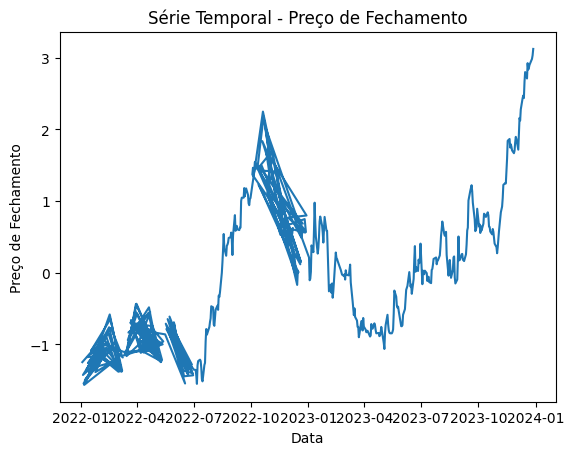

In [97]:
plt.plot(merged_df['Data'], merged_df['Preco_Fechamento'])
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Série Temporal - Preço de Fechamento')
plt.show()

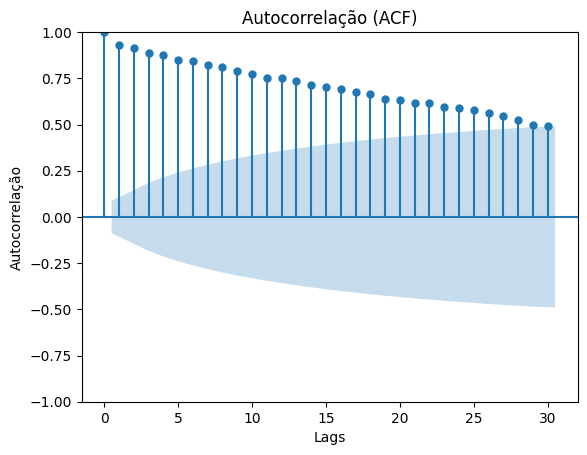

In [98]:
plot_acf(merged_df['Preco_Fechamento'], lags=30)
plt.title('Autocorrelação (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.show()

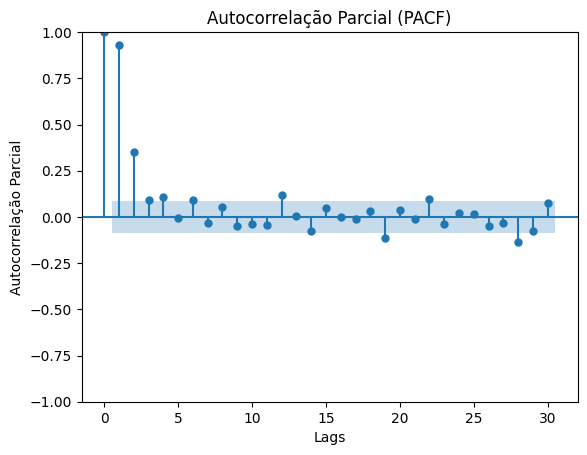

In [99]:
# Calcular e plotar a PACF
plot_pacf(merged_df['Preco_Fechamento'], lags=30)
plt.title('Autocorrelação Parcial (PACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.show()

In [154]:
train_size = int(len(merged_df) * 0.6)  # 70% para treinamento
train, test = merged_df[:train_size]['Preco_Fechamento'], merged_df[train_size:]['Preco_Fechamento']
print(train_size)
print(train.isnull().sum())



298
0


In [155]:
train_diff = train.diff().dropna()

In [156]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model)

c:\Users\mpsga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mpsga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mpsga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [157]:
predictions = model_fit.forecast(steps=len(test))
print(predictions)

298   -0.024541
299   -0.018630
300   -0.018312
301   -0.018295
302   -0.018294
         ...   
493   -0.018294
494   -0.018294
495   -0.018294
496   -0.018294
497   -0.018294
Name: predicted_mean, Length: 200, dtype: float64


c:\Users\mpsga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mpsga\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


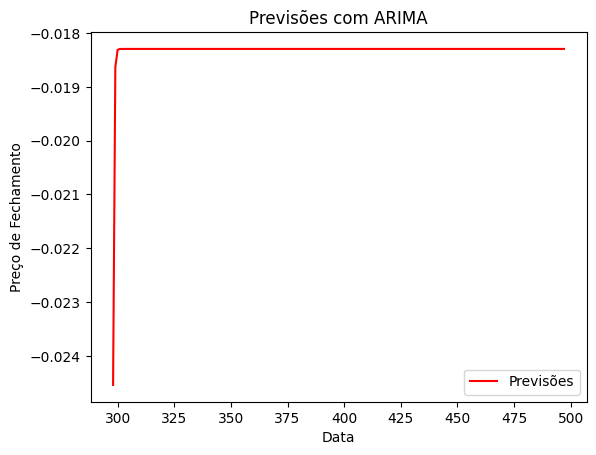

In [165]:
plt.plot(predictions.index, predictions.values, color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsões com ARIMA')
plt.legend()
plt.show()

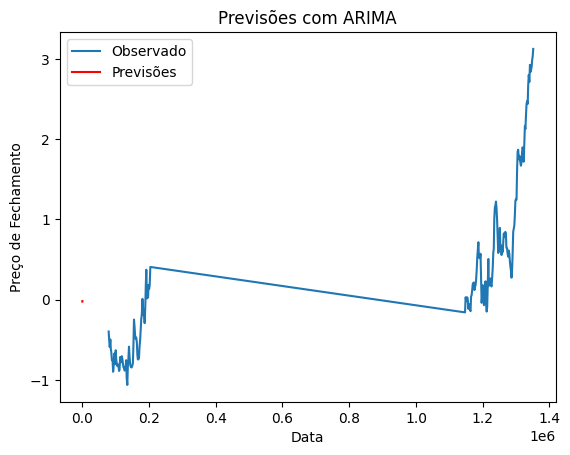

In [166]:
plt.plot(test.index, test.values, label='Observado')
plt.plot(predictions.index, predictions.values, color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsões com ARIMA')
plt.legend()
plt.show()

In [167]:
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carregar o arquivo da primeira base de dados
df3 = pd.read_fwf('COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

# Filtrar pela ação 02NEXP3
df3 = df3[df3['Codigo'].str.endswith('02ABCB4')]

print(df3)

            Data   Codigo  Preco_Abertura  Preco_Fechamento
2       20240102  02ABCB4          2398.0            2279.0
1778    20240103  02ABCB4          2274.0            2274.0
3820    20240104  02ABCB4          2344.0            2278.0
5413    20240105  02ABCB4          2283.0            2274.0
7116    20240108  02ABCB4          2344.0            2327.0
...          ...      ...             ...               ...
95703   20240322  02ABCB4          2443.0            2393.0
97103   20240325  02ABCB4          2420.0            2407.0
98857   20240326  02ABCB4          2427.0            2418.0
100774  20240327  02ABCB4          2450.0            2439.0
102209  20240328  02ABCB4          2495.0            2423.0

[61 rows x 4 columns]


In [168]:
test_2024 = df3['Preco_Fechamento']
print(test_2024)

2         2279.0
1778      2274.0
3820      2278.0
5413      2274.0
7116      2327.0
           ...  
95703     2393.0
97103     2407.0
98857     2418.0
100774    2439.0
102209    2423.0
Name: Preco_Fechamento, Length: 61, dtype: float64


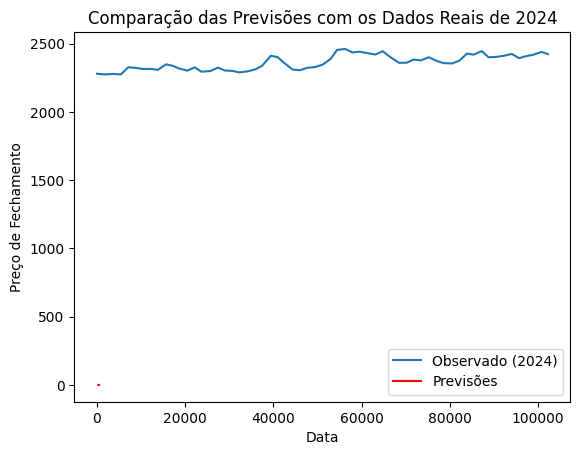

In [169]:
# Plotar as previsões e os dados reais de 2024
plt.plot(test_2024.index, test_2024.values, label='Observado (2024)')
plt.plot(predictions.index, predictions.values, color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação das Previsões com os Dados Reais de 2024')
plt.legend()
plt.show()

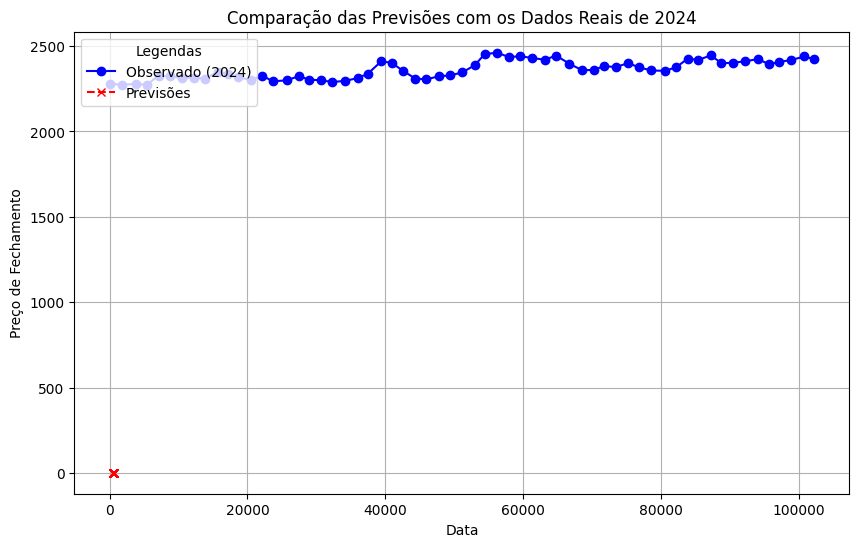

In [134]:
import matplotlib.pyplot as plt

# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar os dados reais de 2024 e as previsões
plt.plot(test_2024.index, test_2024.values, color='blue', linestyle='-', marker='o', label='Observado (2024)')
plt.plot(predictions.index, predictions.values, color='red', linestyle='--', marker='x', label='Previsões')

# Adicionar rótulos de eixo e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação das Previsões com os Dados Reais de 2024')

# Adicionar legenda com melhor posição e título
plt.legend(loc='upper left', title='Legendas')

# Adicionar grade para facilitar a comparação
plt.grid(True)

# Exibir o gráfico
plt.show()
